# NLTK
**双联语**

NLTK 是最常用的自然语言处理库。首先现在语料库，运行下面代码，弹出下载列表，选在需要下载书籍（book）：
```python
import nltk
nltk.download()
```
如下图：
![image](https://ws3.sinaimg.cn/large/69d4185bly1fygo0fwtxij20n90dajtj.jpg)

下载完成就可以导入 `book` 使用其中的 `text`，:
```python
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
```
其中的每一个 `text*` 都表示一个节点，如 `text1`:
```python
text1

<Text: Moby Dick by Herman Melville 1851>
```

有了书籍节点，就可以进行相应的操作，如搜索`concordance`：
```python
text1.concordance('chaplain')

Displaying 3 of 3 matches:
re insular and incommunicable . The chaplain had not yet arrived ; and there the
sted that this fine old man was the chaplain . Yes , it was the famous Father Ma
re of the place , borrowed from the chaplain ' s former sea - farings . Between 
```

相似性检索 `similar`，ship ~ boat:
```python
text1.similar('ship')

whale boat sea captain world way head time crew man other pequod line
deck fishery body air voyage side boats
```

查看此在文章中出现的位置：
```python
from IPython.display import display
x = text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
display(x)
```
![img](https://wx2.sinaimg.cn/large/69d4185bly1fygoir8roaj20bi07qaa1.jpg)

词统计：
- `len(text1)` ： 返回总字数
- `set(text1)` ：返回文本的所有词的集合
- `len(set(text1))` ：返回文本总词数（无重复）
- `text4.count('is')` ：统计及某个词出现的总次数
- `FreqDist(text1)` ：返回文章的词频并按照大小排序到一个列表里
- `text4.collocations()` ：返回双联语（United States; fellow citizens; four years; years ago）

词频累积并绘图：
```python
fdist1 = FreqDist(text1)
plot = fdist1.plot(50, cumulative=True)
display(plot)
```
![img](https://wx2.sinaimg.cn/large/69d4185bly1fygoohb5vyj20bf07xjrl.jpg)

In [11]:
import nltk
from nltk.book import *
from IPython.display import display

# 自然语言处理关键

**词意理解**：中国队大胜美国队；中国队大败美国队。“胜”、“败”一对反义词，却表达同样的意思：中国赢了，美国输了。这需要机器能够自动分析出谁胜谁负

**自动生成语言**：自动生成语言基于语言的自动理解，不理解就无法自动生成

**机器翻译**：现在机器翻译已经很多了，但是还很难达到最佳，比如我们把中文翻译成英文，再翻译成中文，再翻译成英文，来回10轮，发现和最初差别还是非常大的。

**人机对话**：这也是我们想做到的最终目标，这里有一个叫做“图灵测试”的方式，也就是在5分钟之内回答提出问题的30%即通过，能通过则认为有智能了。

自然语言处理分两派，一派是基于规则的，也就是完全从语法句法等出发，按照语言的规则来分析和处理，这在上个世纪经历了很多年的试验宣告失败，因为规则太多太多，而且很多语言都不按套路出牌，想象你追赶你的影子，你跑的快他跑的更快，你永远都追不上它。另一派是基于统计的，也就是收集大量的语料数据，通过统计学习的方式来理解语言，这在当代越来越受重视而且已经成为趋势，因为随着硬件技术的发展，大数据存储和计算已经不是问题，无论有什么样的规则，语言都是有统计规律的，当然基于统计也存在缺陷，那就是“小概率事件总是不会发生的”导致总有一些问题解决不了。

# 语料与词汇资源
概念：**词对链表**

NLTK 中包含很多语料库，如 `Gutenberg` 语料库:
```python
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']
```

`nltk.corpus.gutenberg`就是`gutenberg`语料库的阅读器，它有很多实用的方法:
- `.raw('chesterton-brown.txt')`：输出chesterton-brown.txt文章的原始内容
- `.words('chesterton-brown.txt')`: 输出chesterton-brown.txt文章的单词列表
- `sents('chesterton-brown.txt')`: 输出chesterton-brown.txt文章的句子列表

nltk.corpus 中包括如下的语料库：
- `.webtext`：网络文本语料库，网络和聊天文本
- `.brown`：布朗语料库，按照文本分类好的500个不同来源的文本
- `.reuters`：路透社语料库，1万多个新闻文档
- `.inaugural`：就职演说语料库，55个总统的演说

语料库结构：  
以上各种语料库都是分别建立的，因此会稍有一些区别，但是不外乎以下几种组织结构：散养式（孤立的多篇文章）、分类式（按照类别组织，相互之间没有交集）、交叉式（一篇文章可能属于多个类）、渐变式（语法随着时间发生变化）

语料库通用接口：  
- `fileids()`：返回语料库中的文件
- `categories()`：返回语料库中的分类
- `raw()`：返回语料库的原始内容
- `words()`：返回语料库中的词汇
- `sents()`：返回语料库句子
- `abspath()`：指定文件在磁盘上的位置
- `open()`：打开语料库的文件流

也可以加载自己搜集的语料库：
```python
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/tmp'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()
```

**条件概率分布**

条件分布大家都比较熟悉了，就是在一定条件下某个事件的概率分布。自然语言的条件频率分布就是指定条件下某个事件的频率分布。比如要输出在布朗语料库中每个类别条件下每个词的概率：

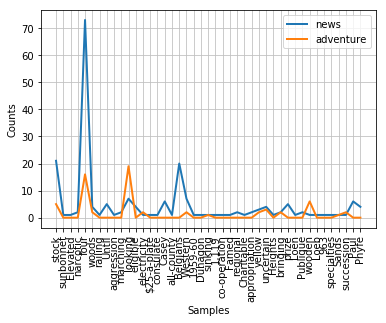

None

In [13]:
import sys
import nltk
from nltk.corpus import brown
from IPython.display import display

# 生成类别和词汇
genre_word = [(genre, word)
             for genre in brown.categories()
             for word in brown.words(categories=genre)]

# 创建条件概率分布
cfd = nltk.ConditionalFreqDist(genre_word)

# 指定条件和样本做图，生成表格可以使用 tabulate
fig = cfd.plot(conditions=['news','adventure'], 
         samples=[u'stock', u'sunbonnet', u'Elevated', u'narcotic', u'four', 
                  u'woods', u'railing', u'Until', u'aggression', u'marching', 
                  u'looking', u'eligible', u'electricity', u'$25-a-plate', 
                  u'consulate', u'Casey', u'all-county', u'Belgians', u'Western', 
                  u'1959-60', u'Duhagon', u'sinking', u'1,119', u'co-operation',
                  u'Famed', u'regional', u'Charitable', u'appropriation', u'yellow',
                  u'uncertain', u'Heights', u'bringing', u'prize', u'Loen',
                  u'Publique', u'wooden', u'Loeb', u'963', u'specialties', 
                  u'Sands', u'succession', u'Paul', u'Phyfe'])
display(fig)

**生成双联词**

我们还可以利用条件频率分布，按照最大条件概率生成双连词，最终生成一个随机文本。这可以直接使用bigrams()函数，它的功能是生成词对链表。

In [18]:
# 打印最大概率的连词
def generate_model(cfdlist, word, num=10):
    words = []
    for i in range(num):
        words.append(word)
        word = cfdlist[word].max()
    print(words)
        
# 添加语料库
text = nltk.corpus.genesis.words('english-kjv.txt')

# 生成双联词
bigrams = nltk.bigrams(text)

# 生成词频
cfd = nltk.ConditionalFreqDist(bigrams)

# 以某个词开头生成随机串
generate_model(cfd, 'the')

# the的最大概率的双连词是land，land最大概率双连词是of，of最大概率双连词是the，所以后面就循环了

['the', 'land', 'of', 'the', 'land', 'of', 'the', 'land', 'of', 'the']


**其他字词资源**

有一些仅是词或短语以及一些相关信息的集合，叫做词典资源。
- 词汇列表语料库：nltk.corpus.words.words()，所有英文单词，这个可以用来识别语法错误
- 停用词语料库：nltk.corpus.stopwords.words，用来识别那些最频繁出现的没有意义的词
- 发音词典：nltk.corpus.cmudict.dict()，用来输出每个英文单词的发音
- 比较词表：nltk.corpus.swadesh，多种语言核心200多个词的对照，可以作为语言翻译的基础
- 同义词集：WordNet，面向语义的英语词典，由同义词集组成，并组织成一个网络

# 词性标注

**词干提取**
```python
porter = nltk.PorterStemmer()
porter.stem('lying')
>>> 'lie'
```

**词性标注**
```python
text = nltk.word_tokenize('And now for something completely different')
nltk.pos_tag(text)
>>> [('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]
```
其中CC是连接词，RB是副词，IN是介词，NN是名次，JJ是形容词.

这是一句完整的话，实际上pos_tag是处理一个词序列，会根据句子来动态判断:
```python
nltk.pos_tag(['i','love','you'])
>>> [('i', 'NN'), ('love', 'VBP'), ('you', 'PRP')]

nltk.pos_tag(['love','and','hate'])
>>> [('love', 'NN'), ('and', 'CC'), ('hate', 'NN')]
```
可以看到  love 在不同的语句中具有不同的词性。

**自己标注词性**
```python
nltk.tag.str2tuple('fly/NN')
>>> ('fly', 'NN')

sent = '我/NN 是/IN 一个/AT 大/JJ 傻×/NN'
[nltk.tag.str2tuple(t) for t in sent.split()]
>>> [('我', 'NN'), ('是', 'IN'), ('一个', 'AT'), ('大', 'JJ'), ('傻×', 'NN')]
```

**查看语料库的标注**
```python
nltk.corpus.brown.tagged_words()
>>> [('The', 'AT'), ('Fulton', 'NP-TL'), ...]
```

**中文语料库**

NLTK 的中文语料库在 `Corpora` 的 `sinica_treebank` 中，sinica就是台湾话中的中国研究院：
![image](https://ws4.sinaimg.cn/large/69d4185bly1fygq3q9l94j20n90dan0t.jpg)

里面的内容如下：
```python
for word in nltk.corpus.sinica_treebank.tagged_words():
    print(word[0], word[1])
    
>>>一 Neu
友情 Nad
嘉珍 Nba
和 Caa
我 Nhaa
住在 VC1
...
```

**自动词性标注**

面对一片新的语料库(比如我们从未处理过中文，只有一批批的中文语料，现在让我们做词性自动标注)，如何实现词性自动标注？有如下几种标注方法：

- *默认标注器*：不管什么词，都标注为频率最高的一种词性。比如经过分析，所有中文语料里的词是名次的概率是13%最大，那么我们的默认标注器就全部标注为名次。这种标注器一般作为其他标注器处理之后的最后一道门，即：不知道是什么词？那么他是名次。默认标注器用 `DefaultTagger` 来实现，具体用法如下：

In [30]:
dt = nltk.DefaultTagger('NN')
raw = '我 累 个 去'
tokens = nltk.word_tokenize(raw)
dt.tag(tokens)

[('我', 'NN'), ('累', 'NN'), ('个', 'NN'), ('去', 'NN')]

- *正则表达式标注器*：满足特定正则表达式的认为是某种词性，比如凡是带“们”的都认为是代词(PRO)。正则表达式标注器通`RegexpTagge`实现，用法如下：

In [32]:
pattern = [(r'.*们$','PRO')]
tagger = nltk.RegexpTagger(pattern)
tokens = nltk.word_tokenize('我们 累 个 去 你们 和 他们 啊')
tagger.tag(tokens)

[('我们', 'PRO'),
 ('累', None),
 ('个', None),
 ('去', None),
 ('你们', 'PRO'),
 ('和', None),
 ('他们', 'PRO'),
 ('啊', None)]

- *查询标注器*：找出最频繁的n个词以及它的词性，然后用这个信息去查找语料库，匹配的就标记上，剩余的词使用默认标注器(回退)。这一般使用一元标注的方式。
- *一元标注*：基于已经标注的语料库做训练，然后用训练好的模型来标注新的语料，使用方法如下：

In [33]:
tagged_sents = [[(u'我', u'PRO'), (u'小兔', u'NN')]]
unigrams_tagger = nltk.UnigramTagger(tagged_sents)
sents = brown.sents(categories='news')
sents = [[u'我', u'你', u'小兔']]
unigrams_tagger.tag(sents[0])

[('我', 'PRO'), ('你', None), ('小兔', 'NN')]

- *二元标注和多元标注*：一元标注指的是只考虑当前这个词，不考虑上下文。二元标注器指的是考虑它前面的词的标注，用法只需要把上面的 `UnigramTagger` 换成 `BigramTagger` 。同理三元标注换成 `TrigramTagger`

- *组合标注器*：为了提高精度和覆盖率，我们对多种标注器组合，比如组合二元标注器、一元标注器和默认标注器，如下：
```python
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0) 
t2 = nltk.BigramTagger(train_sents, backoff=t1) 
```

- *标注器的存储*：训练好的标注器为了持久化，可以存储到硬盘，具体方法如下：
```python
from cPickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()
```
读取：
```python
input = open('t2.pkl', 'rb') 
tagger = load(input) 
input.close()
```

# 文本、文档分类

NLTK 中的贝叶斯分类器，如下执行后判断特征a和特征b的分类分别是3和2，因为训练集中特征是a的分类是3的最多，所以会归类为3， 当然实际中训练样本的数量要多的多，特征要多的多。

In [34]:
import sys
import nltk
my_train_set = [
        ({'feature1':u'a'},'1'),
        ({'feature1':u'a'},'2'),
        ({'feature1':u'a'},'3'),
        ({'feature1':u'a'},'3'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ({'feature1':u'b'},'2'),
        ]
cls = nltk.NaiveBayesClassifier.train(my_train_set)
print(cls.classify({'feature1':u'a'}), cls.classify({'feature1':u'b'}))

3 2


**文档分类**

不管是什么分类，最重要的是要知道哪些特征是最能反映这个分类的特点，也就是特征选取。文档分类使用的特征就是最能代表这个分类的词。因为对文档分类要经过训练和预测两个过程，而特征的提取是这两个过程都需要的，所以，习惯上我们会把特征提取单独抽象出来作为一个公共方法.

这是一个简单的特征提取过程，前两行找到movie_reviews语料库中出现词频最高的2000个词作为特征，下面定义的函数就是特征提取函数，每个特征都是形如contains(\***)的key，value就是True或False，表示这个词是否在文档中出现

In [40]:
from nltk.corpus import movie_reviews
import random

# 读取文档
documents = [(list(movie_reviews.words(fileid)), category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())[:2000]

def document_features(doc):
    doc_words = set(doc)
    features={}
    for word in word_features:
        features['contains(%s)' % word] = (word in doc_words)
    return features

# 训练
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# 测试精度
print(nltk.classify.accuracy(classifier, test_set))

# 预测
# classifier.classify(document_features(d))

# 可以找到最优信息量的特征
classifier.show_most_informative_features(5)

0.65
Most Informative Features
     contains(ludicrous) = True              neg : pos    =     10.7 : 1.0
  contains(wisecracking) = True              neg : pos    =      7.7 : 1.0
   contains(uninvolving) = True              neg : pos    =      7.4 : 1.0
   contains(fulfillment) = True              pos : neg    =      7.0 : 1.0
         contains(rabid) = True              neg : pos    =      6.3 : 1.0


**其他分类**

- `词性标注`：属于一种文本分类，一般是基于上下文语境的文本分类
- `句子分割`：属于标点符号的分类任务，它的特征一般选取为单独句子标识符的合并链表、数据特征（下一个词是否大写、前一个词是什么、前一个词长度……）
- `识别对话行为类型`：对话行为类型是指问候、问题、回答、断言、说明等
- `识别文字蕴含`：即一个句子是否能得出另外一个句子的结论，这可以认为是真假标签的分类任务。这是一个有挑战的事情

# 提取信息

**结构化**

比如说：“我下午要和小明在公司讨论一个技术问题”。这是非结构化的词语拼成的一句话，但是这里面有很多隐含信息：

1. 小明是一个实体
1. 参与者有两个：我和小明
1. 地点设定是：公司
1. 要做的事情是：讨论
1. 讨论的内容是：问题
1. 这个问题是一个技术问题
1. 公司是一个地点
1. 讨论是一种行为
1. 我和小明有某种关系
1. 下午是一个时间

上面这些信息有一些是专门针对这个句子的，有一些是常理性的，对于针对句子的信息有利于理解这句话，对于常理性的信息可以积累下来用来以后理解其他句子。

那么怎么才能把非结构化的句子转成结构化的信息呢？要做的工作除了断句、分词、词性标注之外，还要做的一个关键事情就是分块。

**分块**

分块就是根据句子中的词和词性，按照某种规则组合在一起形成一个个分块，每个分块代表一个实体。常见的实体包括：组织、人员、地点、日期、时间等

以上面的例子为例，首先我们做名词短语分块（NP-chunking），比如：技术问题。名词短语分块通过词性标记和一些规则就可以识别出来，也可以通过机器学习的方法识别

除了名词短语分块还有很多其他分块：介词短语（PP，比如：以我……）、动词短语（VP，比如：打人）、句子（S，我是人）

**分块存储**

可以采用IOB标记，I(inside，内部)、O(outside，外部)、B(begin, 开始)，一个块的开始标记为B，块内的标识符序列标注为I，所有其他标识符标注为O

也可以用树结构来存储分块，用树结构可以解决IOB无法标注的另一类分块，那就是多级分块。多级分块就是一句话可以有多重分块方法，比如：我以我的最高权利惩罚你。这里面“最高权利”、“我的最高权利”、“以我的最高权利”是不同类型分块形成一种多级分块，这是无法通过IOB标记的，但是用树结构可以。这也叫做级联分块。具体树结构举个例子：
```
(S
    (NP 小明) 
    (VP
        (V 追赶) 
        (NP
            (Det 一只) 
            (N 兔子)))) 
```

**关系抽取**

通过上面的分块可以很容易识别出实体，那么关系抽取实际就是找出实体和实体之间的关系，这是自然语言处理一个质的跨越，实体识别让机器认知了一种事物，关系识别让机器掌握了一个真相。

关系抽取的第一个方法就是找到(X, a, Y)这种三元组，其中X和Y都是实体，a是表达关系的字符串，这完全可以通过正则来识别，因为不同语言有这不同的语法规则，所以方法都是不同的，比如中文里的“爱”可以作为这里的a，但是“和”、“因为”等就不能作为这里的a。

下面使用 conll2000语料中已经有标注好的分块信息，我们可以基于这些标注数据做训练，由于这种存储结构比较特殊，所以就不单独基于这种结构实现parser了，只说下跟前面讲的机器学习一样，只要基于这部分数据做训练，然后再用来标注新的语料就行了。

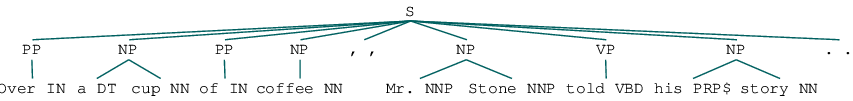

In [2]:
from nltk.corpus import  conll2000
from IPython.display import display
fig = conll2000.chunked_sents('train.txt')[99]
display(fig)

# 文法分析

上面的例子：
```
(S
    (NP 小明) 
    (VP
        (V 追赶) 
        (NP
            (Det 一只) 
            (N 兔子)))) 
```
这里面的N表示名词，Det表示限定词，NP表示名词短语，V表示动词，VP表示动词短语，S表示句子，这种句子分析方法叫做语法分析。

因为句子可以无限组合无限扩展，所以单纯用语法分析来完成自然语言处理这件事情是不可能的，所以出现了文法分析。文法是一个潜在的无限的句子集合的一个紧凑的特性，它是通过一组形式化模型来表示的，文法可以覆盖所有结构的句子，对一个句子做文法分析，就是把句子往文法模型上靠，如果同时符合多种文法，那就是有歧义的句子。

最重要的结论：文法结构范围相当广泛，无法用规则类的方法来处理，只有利用基于特征的方法才能处理。

**文法结构**

文法特征举例：单词最后一个字母、词性标签、文法类别、正字拼写、指示物、关系、施事角色、受事角色。因为文法特征是一种kv，所以特征结构的存储形式是字典。

不是什么样的句子都能提取出每一个文法特征的，需要满足一定的条件，这需要通过一系列的检查手段来达到，包括：句法协议（比如this dog就是对的，而these dog就是错的）、属性和约束、术语。

NLTK 中实现了特征结构：

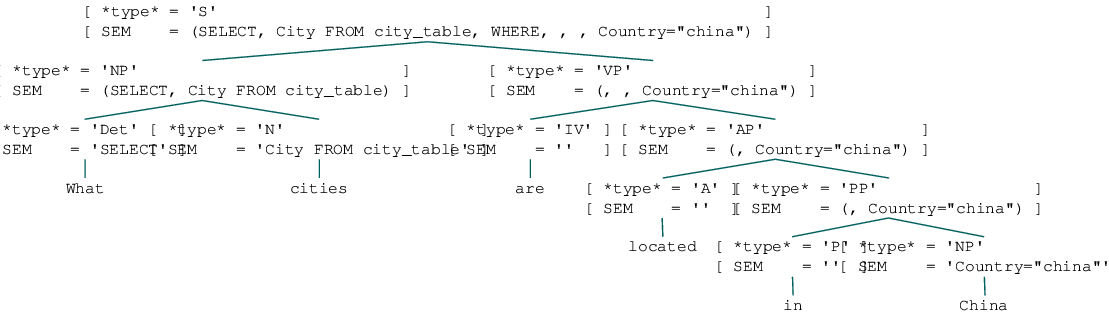

In [4]:
import nltk
from nltk import load_parser
from IPython.display import display

cp = load_parser('/Users/weduoo/nltk_data/grammars/book_grammars/sql0.fcfg')
query = 'What cities are located in China'
tokens = query.split()
for tree in cp.parse(tokens):
    display(tree)